# 資料-->文件

這部分將用 [nlp-in-python-tutorial, 範例一](https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/1-Data-Cleaning.ipynb)
作爲原型，來運用在中文資料處理上

## 1.1 取得資料
從華視新聞網站爬下資料
需要的python 模組 有: <br>
 *request <br>
 *beautiful soup <br>
 如何爬取資料, 請參考:[網路爬蟲Day1 - 概述](https://ithelp.ithome.com.tw/articles/10190994)<br><br>
 把資料讀進 pandas datafram<br>

In [ ]:
#!pip install jieba

In [2]:
import pandas as pd
import re
import string
import jieba
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')
raw_data_pd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_my/cts.raw.csv",header=None, names=['id','contents', 'labels'])
raw_data_pd.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,contents,labels
0,life_0001,0823豪大雨造成南部地區重大災情，除了淹水災民收拾家園很辛苦，也要帶您來看到辛苦的清潔隊員...,life
1,sports_0002,108年全國運動會10月份將在桃園登場，主辦的桃園市政府找來男性時尚媒體跨界合作，還邀請連續...,sports
2,international_0003,10月底「美台國防工業會議」將在美國登場，國防部證實確實有收到邀請函，但國防部長嚴德發是否率...,international


In [4]:
raw_data_df = pd.DataFrame.from_dict(raw_data_pd)
raw_data_df.columns = ['ids','contents','topics']

## 1.2 整理資料
處理資料要經過下列步驟<br>
1.去除不必要的符號等: clean_text_round1<br>
2.中文需要斷詞: clean_text_round2<br>

In [5]:
# 刪除一些標點符號、數字和數字
def clean_text_round1(text):
    r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。、！「」?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r1, '', text)
    r2 = re.compile('<.*?>')
    text = re.sub(r2, '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [6]:
clean_data = pd.DataFrame(raw_data_df.contents.apply(round1))
clean_data.head(3)

,contents
0,豪大雨造成南部地區重大災情除了淹水災民收拾家園很辛苦也要帶您來看到辛苦的清潔隊員台南市環保局...
1,年全國運動會月份將在桃園登場主辦的桃園市政府找來男性時尚媒體跨界合作還邀請連續年擔任金曲獎視...
2,月底美台國防工業會議將在美國登場國防部證實確實有收到邀請函但國防部長嚴德發是否率團參加還需要...


In [7]:
# 儲存檔案，等一下會用到
import os
os.makedirs("/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle", mode=0o777,exist_ok=True)
clean_data.to_pickle("/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle/clean_data_sentence.pkl")

In [8]:
# 用 jieba 來斷詞
def clean_text_round2(text):
    seg_list = jieba.lcut(text, cut_all=False)
    seg_str = ' '.join(seg_list)
    return seg_str

round2 = lambda x: clean_text_round2(x)

In [9]:
clean_data = pd.DataFrame(clean_data.contents.apply(round2))
clean_data.head(3)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.578 seconds.
DEBUG:jieba:Loading model cost 0.578 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,contents
0,豪 大雨 造成 南部 地區 重大 災情 除了 淹水 災民 收拾 家園 很 辛苦 也 要 帶 ...
1,年 全國 運動會 月份 將在 桃園 登場 主辦 的 桃園 市政府 找來 男性 時尚 媒體 跨...
2,月底 美台 國防 工業會 議將 在 美國 登場國 防部 證實 確實 有 收到 邀請 函 但國...


In [10]:
# 計算內容中的字數
clean_data['num_word'] = pd.DataFrame(clean_data.contents.apply(lambda x: len(str(x).split(' '))))
clean_data.num_word.head(3)

0    203
1    161
2     80
Name: num_word, dtype: int64

In [11]:
# 將數字 還有其他之前 dataframe 部分結合起來
combined_data = [raw_data_df.ids,clean_data,raw_data_df.topics]
clean_data_df = pd.concat(combined_data, axis=1)
clean_data_df.head(10)

,ids,contents,num_word,topics
0,life_0001,豪 大雨 造成 南部 地區 重大 災情 除了 淹水 災民 收拾 家園 很 辛苦 也 要 帶 ...,203,life
1,sports_0002,年 全國 運動會 月份 將在 桃園 登場 主辦 的 桃園 市政府 找來 男性 時尚 媒體 跨...,161,sports
2,international_0003,月底 美台 國防 工業會 議將 在 美國 登場國 防部 證實 確實 有 收到 邀請 函 但國...,80,international
3,life_0004,歲 以上 寶寶 最近 要 打 公費常規 疫苗 或 歲 以上 長 者 想 打 肺炎 鏈 球菌 ...,118,life
4,life_0005,台灣 燈會 今年 在 台 中 結合 了 大量 的 原住民 文化 主展區 的 原藝 交響 燈區...,184,life
5,life_0006,年 台北 燈節將 在 月 日 到 日 登場 今度 以 轉洞 台北 轉動 光為 主題 首次 採...,90,life
6,politics_0007,總統 大選 電視 辯論會 昨天下午 登場 國民黨 總統候 選人 韓國瑜 痛批 三立 電視台 ...,216,politics
7,politics_0008,總統 大選 總統 蔡 英文 成功 連任 可以 再 做 四年 受訪 的 學者 認為 不 意外 ...,321,politics
8,general_0009,月 日 帶 您 回顧 歷史 上 的 今天 年月日 中國將 駐 紮 在 越南 境內 的 軍隊 ...,139,general
9,general_0010,月 日 帶 您 回顧 歷史 上 的 今天 年月日 軍事 法庭 第一次 開庭 審理 高雄 美麗...,138,general


In [13]:
# 儲存檔案
clean_data_df.to_pickle("/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle/clean_data_segment.pkl")

## 1.3 資料擷取
1.把資料精粹 --> Document-Term Matrix<br>

In [14]:
# 讀取檔案
data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle/clean_data_segment.pkl')
data.head(3)
ckp = data.groupby("topics").count()
ckp

,ids,contents,num_word
topics,,,
arts,18,18,18
campus,3,3,3
entertain,24,24,24
general,101,101,101
international,115,115,115
life,331,331,331
local,91,91,91
money,29,29,29
politics,113,113,113


In [15]:
# 利用 CountVectorizer 將文章轉變成詞匯與數字的矩陣
from sklearn.feature_extraction.text import CountVectorizer

stop_words_file ="/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_my/stop.words.chinese.txt"

with open(stop_words_file, 'rb') as swf:
    stopword = swf.read().decode('utf-8')

stpwrdlst = stopword.splitlines()
cv = CountVectorizer(stop_words=stpwrdlst)
data_cv = cv.fit_transform(data.contents)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data.index

In [16]:
# 檔案存儲起來，等一下會用到
data_dtm.to_pickle("/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle/dtm_stop.pkl")

In [17]:
# 顯示第二到第四行的資料
data_dtm.loc[2:4]

,一一,一上,一上車,一下,一下子,一下子把,一下肚子,一不小心,一中,一串,...,龐大金額,龐然,龐皮,龐皮歐,龔明鑫,龜山島,龜山間,龜苓,龜裂,龜速
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#顯示 data_dtm 的形狀(row, column)
data_dtm.shape

(1001, 32869)

In [19]:
#取得特定的行的數據
s=data_dtm.loc[:].sum()
#data_dtm.loc[20,'一上車']
#data_dtm.transpose().loc[:].sum()

In [20]:
# 找出top-20 常出現的文字
stop_word2 = s.sort_values(ascending=False)[0:20]
stop_word2

台灣    633
疫情    611
口罩    449
一個    409
民眾    332
病毒    319
表示    308
總統    296
已經    275
防疫    274
影響    272
目前    271
希望    252
政府    237
時間    225
地區    224
感染    223
武漢    220
肺炎    216
發生    213
dtype: int64

In [21]:
# 將 num_word_stop 也結合在 dataframe
clean_data_df['num_word_stop'] = data_dtm.transpose().loc[:].sum()
clean_data_df.head(10)

,ids,contents,num_word,topics,num_word_stop
0,life_0001,豪 大雨 造成 南部 地區 重大 災情 除了 淹水 災民 收拾 家園 很 辛苦 也 要 帶 ...,203,life,124
1,sports_0002,年 全國 運動會 月份 將在 桃園 登場 主辦 的 桃園 市政府 找來 男性 時尚 媒體 跨...,161,sports,118
2,international_0003,月底 美台 國防 工業會 議將 在 美國 登場國 防部 證實 確實 有 收到 邀請 函 但國...,80,international,60
3,life_0004,歲 以上 寶寶 最近 要 打 公費常規 疫苗 或 歲 以上 長 者 想 打 肺炎 鏈 球菌 ...,118,life,84
4,life_0005,台灣 燈會 今年 在 台 中 結合 了 大量 的 原住民 文化 主展區 的 原藝 交響 燈區...,184,life,115
5,life_0006,年 台北 燈節將 在 月 日 到 日 登場 今度 以 轉洞 台北 轉動 光為 主題 首次 採...,90,life,59
6,politics_0007,總統 大選 電視 辯論會 昨天下午 登場 國民黨 總統候 選人 韓國瑜 痛批 三立 電視台 ...,216,politics,122
7,politics_0008,總統 大選 總統 蔡 英文 成功 連任 可以 再 做 四年 受訪 的 學者 認為 不 意外 ...,321,politics,172
8,general_0009,月 日 帶 您 回顧 歷史 上 的 今天 年月日 中國將 駐 紮 在 越南 境內 的 軍隊 ...,139,general,89
9,general_0010,月 日 帶 您 回顧 歷史 上 的 今天 年月日 軍事 法庭 第一次 開庭 審理 高雄 美麗...,138,general,88


In [22]:
#show th number of occurrence is 0 in row from 2 to 4
data_dtm.loc[2:4,(data_dtm.loc[2:4] == 0).all()]

,一一,一上,一上車,一下,一下子,一下子把,一下肚子,一不小心,一中,一串,...,龐大金額,龐然,龐皮,龐皮歐,龔明鑫,龜山島,龜山間,龜苓,龜裂,龜速
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
len(cv.stop_words)

1209

In [24]:
pickle.dump(cv, open("/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle/cv_stop.pkl", "wb"))

## 1.4 每個主題顯示代表的文字

In [25]:
data_df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle/clean_data_segment.pkl')
data_df.head(3)

,ids,contents,num_word,topics
0,life_0001,豪 大雨 造成 南部 地區 重大 災情 除了 淹水 災民 收拾 家園 很 辛苦 也 要 帶 ...,203,life
1,sports_0002,年 全國 運動會 月份 將在 桃園 登場 主辦 的 桃園 市政府 找來 男性 時尚 媒體 跨...,161,sports
2,international_0003,月底 美台 國防 工業會 議將 在 美國 登場國 防部 證實 確實 有 收到 邀請 函 但國...,80,international


In [26]:
# 把相同 topic 的内同串起來
data_by_topic_df = data_df.groupby(data_df['topics'])['contents'].apply(' '.join)
data_by_topic_df.head(3)

topics
arts         旅居 台灣 的 西班牙 藝術家 阿里 巴魯 ‧ 圖魯荷 達 在 台北 當代藝術館 舉辦 個展...
campus       來 自 越南 的 鄭翠玄 同學現 在 成 了 蘇澳 之光 兩年 多前 她 跟 著媽媽 到 台...
entertain    中國 新型 冠狀 病毒 疫情 重災區 湖北省 武漢市 在 解封 後 一個 多月 後 又 出現...
Name: contents, dtype: object

In [27]:
# 重新定義
aggregation_functions = {'contents': 'sum', 'num_word': 'sum', 'topics': 'first'}
seg_by_topic_df = data_df.groupby(data_df['topics']).aggregate(aggregation_functions)
seg_by_topic_df.head(12)

,contents,num_word,topics
topics,,,
arts,旅居 台灣 的 西班牙 藝術家 阿里 巴魯 ‧ 圖魯荷 達 在 台北 當代藝術館 舉辦 個展...,3896,arts
campus,來 自 越南 的 鄭翠玄 同學現 在 成 了 蘇澳 之光 兩年 多前 她 跟 著媽媽 到 台...,606,campus
entertain,中國 新型 冠狀 病毒 疫情 重災區 湖北省 武漢市 在 解封 後 一個 多月 後 又 出現...,5047,entertain
general,月 日 帶 您 回顧 歷史 上 的 今天 年月日 中國將 駐 紮 在 越南 境內 的 軍隊 ...,25098,general
international,月底 美台 國防 工業會 議將 在 美國 登場國 防部 證實 確實 有 收到 邀請 函 但國...,23150,international
life,豪 大雨 造成 南部 地區 重大 災情 除了 淹水 災民 收拾 家園 很 辛苦 也 要 帶 ...,72700,life
local,一名 上個 月 在 台灣 演出 的 外籍 音樂家 日 搭乘 長 榮班機 從 台北 前往 澳洲...,19520,local
money,來 關心 台股 收盤 的 消息 今天 （ 日 ） 在 大立 光鴻海 帶動下 指數 小漲 開出...,1820,money
politics,總統 大選 電視 辯論會 昨天下午 登場 國民黨 總統候 選人 韓國瑜 痛批 三立 電視台 ...,26780,politics


In [28]:
seg_by_topic_df.to_pickle("/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/data_pickle/clean_data_segment_by_topic.pkl")

### wordCloud畫圖

### copy [msjh.ttc](https://github.com/taveevut/Windows-10-Fonts-Default/blob/master/msjh.ttc)

複製到 C:\Windows\Fonts\msjh.ttc

In [35]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stopword, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, font_path="/content/drive/MyDrive/Colab Notebooks/2024.01.05/topic_model_example-master/msjh.ttc")

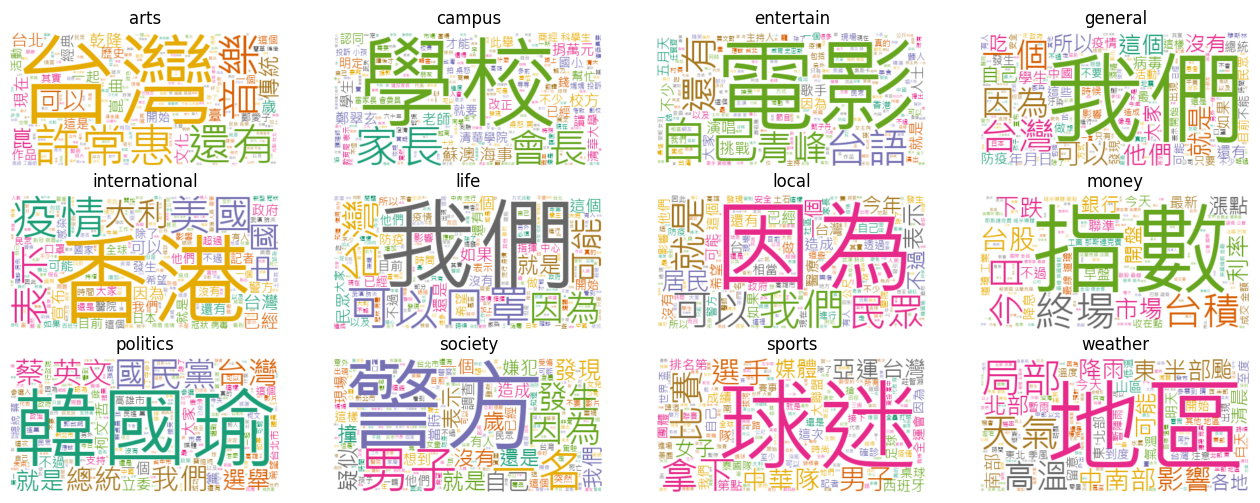

In [36]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
topic = ["arts", "campus", "entertain", "general", "international", "life", "local", "money", "politics", "society", "sports", "weather"]

# Create subplots for each comedian
for index, topics in enumerate(topic):
    wc.generate(seg_by_topic_df.contents[topics])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topic[index])

plt.show()

In [37]:
## 有些字太常出現，不能代表 topic 的内容
stop_word2=['我們','台灣', '因爲']

In [38]:
# 將常出現的字去除，並顯示去除常見文字之後的數字
seg_by_topic_df['contenet_without_stop_word']=seg_by_topic_df['contents'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word2)]))
seg_by_topic_df['num_without_stop_word'] = pd.DataFrame(seg_by_topic_df.contenet_without_stop_word.apply(lambda x: len(str(x).split(' '))))
seg_by_topic_df.head(10)

,contents,num_word,topics,contenet_without_stop_word,num_without_stop_word
topics,,,,,
arts,旅居 台灣 的 西班牙 藝術家 阿里 巴魯 ‧ 圖魯荷 達 在 台北 當代藝術館 舉辦 個展...,3896,arts,旅居 的 西班牙 藝術家 阿里 巴魯 ‧ 圖魯荷 達 在 台北 當代藝術館 舉辦 個展 激情...,3847
campus,來 自 越南 的 鄭翠玄 同學現 在 成 了 蘇澳 之光 兩年 多前 她 跟 著媽媽 到 台...,606,campus,來 自 越南 的 鄭翠玄 同學現 在 成 了 蘇澳 之光 兩年 多前 她 跟 著媽媽 到 依...,602
entertain,中國 新型 冠狀 病毒 疫情 重災區 湖北省 武漢市 在 解封 後 一個 多月 後 又 出現...,5047,entertain,中國 新型 冠狀 病毒 疫情 重災區 湖北省 武漢市 在 解封 後 一個 多月 後 又 出現...,5008
general,月 日 帶 您 回顧 歷史 上 的 今天 年月日 中國將 駐 紮 在 越南 境內 的 軍隊 ...,25098,general,月 日 帶 您 回顧 歷史 上 的 今天 年月日 中國將 駐 紮 在 越南 境內 的 軍隊 ...,24833
international,月底 美台 國防 工業會 議將 在 美國 登場國 防部 證實 確實 有 收到 邀請 函 但國...,23150,international,月底 美台 國防 工業會 議將 在 美國 登場國 防部 證實 確實 有 收到 邀請 函 但國...,22915
life,豪 大雨 造成 南部 地區 重大 災情 除了 淹水 災民 收拾 家園 很 辛苦 也 要 帶 ...,72700,life,豪 大雨 造成 南部 地區 重大 災情 除了 淹水 災民 收拾 家園 很 辛苦 也 要 帶 ...,71881
local,一名 上個 月 在 台灣 演出 的 外籍 音樂家 日 搭乘 長 榮班機 從 台北 前往 澳洲...,19520,local,一名 上個 月 在 演出 的 外籍 音樂家 日 搭乘 長 榮班機 從 台北 前往 澳洲 布 ...,19343
money,來 關心 台股 收盤 的 消息 今天 （ 日 ） 在 大立 光鴻海 帶動下 指數 小漲 開出...,1820,money,來 關心 台股 收盤 的 消息 今天 （ 日 ） 在 大立 光鴻海 帶動下 指數 小漲 開出...,1785
politics,總統 大選 電視 辯論會 昨天下午 登場 國民黨 總統候 選人 韓國瑜 痛批 三立 電視台 ...,26780,politics,總統 大選 電視 辯論會 昨天下午 登場 國民黨 總統候 選人 韓國瑜 痛批 三立 電視台 ...,26456


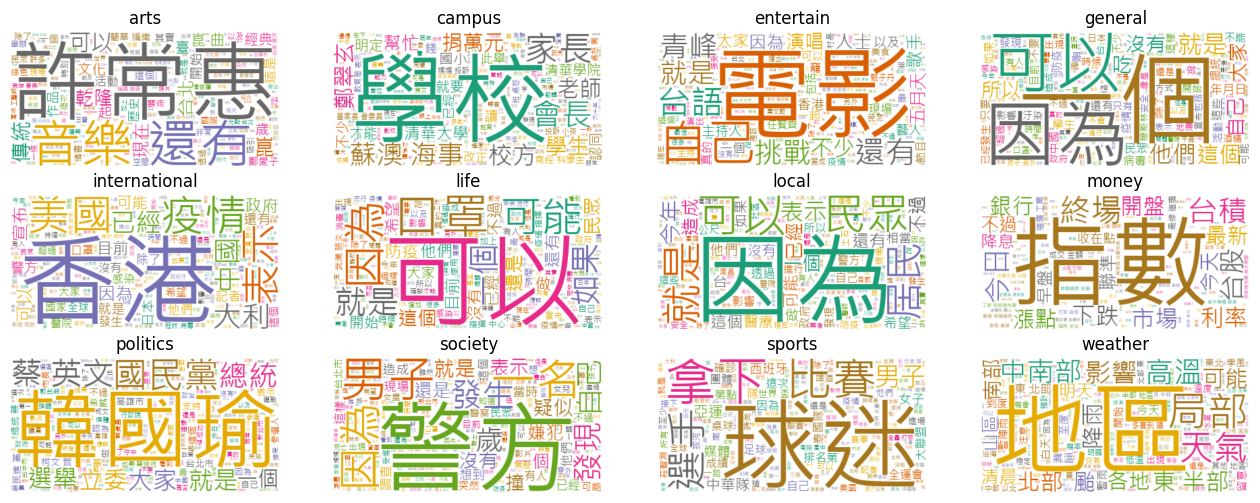

In [39]:
# 畫圖
for index, topics in enumerate(topic):
    wc.generate(seg_by_topic_df.contenet_without_stop_word[topics])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topic[index])

plt.show()

In [42]:
#seg_by_topic_df['contenet_without_stop_word'].str.contains('因爲')
seg_by_topic_df['contenet_without_stop_word'].str.contains('因為')

topics
arts              True
campus           False
entertain         True
general           True
international     True
life              True
local             True
money             True
politics          True
society           True
sports            True
weather           True
Name: contenet_without_stop_word, dtype: bool